In [1]:
import numpy as np
import pandas as pd
import json

from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering


In [2]:
pd.__version__

'1.3.5'

In [3]:
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt

import dataframe_image as dfi

In [4]:
with open('../../data/fl_florida_zip_codes_geo.min.json', 'r') as f:
    fla_shapefiles = json.load(f)

In [5]:
total_df = pd.read_csv('../../data/total_df2.csv')
total_df_col_set = set(total_df.columns)
total_df_col_set

{'FLSTHPI_Yearly_Avg',
 'FL_Unemployment',
 'Monthly_Avg_Zip',
 'aggregate_travel_time_to_work',
 'armed_forces',
 'associates_degree',
 'bachelors_degree',
 'bachelors_degree_2',
 'bachelors_degree_or_higher_25_64',
 'children',
 'children_in_single_female_hh',
 'civilian_labor_force',
 'commute_10_14_mins',
 'commute_15_19_mins',
 'commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_44_mins',
 'commute_45_59_mins',
 'commute_60_more_mins',
 'commute_less_10_mins',
 'commuters_16_over',
 'commuters_by_bus',
 'commuters_by_car_truck_van',
 'commuters_by_carpool',
 'commuters_by_public_transportation',
 'commuters_by_subway_or_elevated',
 'commuters_drove_alone',
 'different_house_year_ago_different_city',
 'different_house_year_ago_same_city',
 'dwellings_10_to_19_units',
 'dwellings_1_units_attached',
 'dwellings_1_units_detached',
 'dwellings_20_to_49_units',
 'dwellings_2_units',
 'dwellings_3_to_4_units',
 'dwellings_50_or_more_units',
 'dwellings_5_to_9

In [6]:
total_df = total_df.set_index('zip_code')
total_df.shape

(641, 218)

In [7]:
cluster_subset_cols = ['vacant_housing_units_for_rent', 'rent_40_to_50_percent', 
       'rent_35_to_40_percent', 'rent_30_to_35_percent' ]

In [8]:
subset_df = total_df[cluster_subset_cols]
subset_df.shape

(641, 4)

In [9]:
%cd ../../images
subdir = "subset7"
!mkdir subset7
%cd ../notebooks/template_instantiations

/home/koz/koz/NYCDSA/Capstone/zillow_rent_index/JOHN/images
/home/koz/koz/NYCDSA/Capstone/zillow_rent_index/JOHN/notebooks/template_instantiations


In [ ]:
######### K Means

In [10]:
km = KMeans(n_clusters = 3).fit(subset_df)

In [11]:
km_subset_df = subset_df.copy()
km_subset_df['km_cluster'] = km.labels_
km_subset_df

,vacant_housing_units_for_rent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,km_cluster
zip_code,,,,,
33160,1203,903.0,526.0,635.0,2
33025,1400,1329.0,902.0,742.0,1
33139,1694,1144.0,866.0,1349.0,1
32256,816,739.0,654.0,1074.0,2
33009,610,723.0,686.0,653.0,2
...,...,...,...,...,...
33413,256,223.0,285.0,199.0,0
32204,108,181.0,160.0,294.0,0
32206,581,319.0,403.0,259.0,0


In [12]:
total_merge_km = pd.merge(total_df, km_subset_df, on = km_subset_df.columns.tolist()[:-1] + ['zip_code'])

In [13]:
total_merge_km

,Monthly_Avg_Zip,FL_Unemployment,year,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,...,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg,median_pct_increase,km_cluster
zip_code,,,,,,,,,,,,,,,,,,,,,
33160,1866.833333,7.533333,2013,37674,19247,18472,19202,49.6,626,654,...,7911.0,4713.0,935,1346,965,6471,2019,291.6550,0.022971,2
33025,1341.083333,7.533333,2013,57766,21206,27852,29914,32.9,2143,2102,...,10806.0,8948.0,2963,3682,3345,18163,4987,291.6550,0.021003,1
33139,1842.666667,7.533333,2013,38066,20883,22090,15976,38.1,981,513,...,9995.0,4865.0,685,649,379,5387,1906,291.6550,0.020404,1
32256,947.750000,7.533333,2013,40024,18039,18865,21159,32.7,1084,1124,...,11070.0,6247.0,1638,1598,1629,10962,3429,291.6550,0.027058,2
33009,1443.416667,7.533333,2013,39889,19125,19256,20633,47.1,1213,830,...,5087.0,4958.0,1335,1020,1249,6495,1885,291.6550,0.028284,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33413,1447.583333,3.625000,2018,17473,5099,8493,8980,34.7,762,638,...,2399.0,2423.0,1103,932,848,4875,1107,444.3875,0.021767,0
32204,1008.750000,3.625000,2018,7507,3825,3352,4155,34.0,110,143,...,2078.0,737.0,176,201,231,1237,269,444.3875,0.012807,0
32206,719.833333,3.625000,2018,16500,6767,7954,8546,37.4,431,519,...,1476.0,1366.0,956,654,757,3743,809,444.3875,0.007578,0


In [14]:
total_merge_km_group_by_cluster = total_merge_km.groupby('km_cluster')['median_pct_increase']\
    .aggregate(['mean'])

total_merge_km_group_by_cluster = total_merge_km_group_by_cluster.style\
    .hide_columns()\
    .set_caption(
    "Median YOY Rent Change By Cluster, KMeans"
)

total_merge_km_group_by_cluster

0,0.039709
1,0.039993
2,0.041201


In [15]:
image_name = "km_numbers.png"
dfi.export(total_merge_km_group_by_cluster,"../../images/" + subdir + "/" + image_name)

In [16]:
total_merge_km.reset_index(inplace=True)
total_merge_km = total_merge_km.rename(columns = {'index':'zipcode'})

In [19]:
# fig = px.choropleth_mapbox(total_merge_km, geojson=fla_shapefiles, locations='zip_code', color='km_cluster',
#                            featureidkey='properties.ZCTA5CE10',
#                            color_continuous_scale="Viridis",
#                            mapbox_style="carto-positron",
#                            zoom=7.2, center = {"lat": 26.2, "lon": -81.0 },
#                            opacity=0.5,
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [18]:
image_name = "km_map.png"
fig.write_image("../../images/" + subdir + "/" + image_name)

In [20]:

cluster_0_km = total_merge_km[total_merge_km['km_cluster'] == 0]
cluster_1_km = total_merge_km[total_merge_km['km_cluster'] == 1]
cluster_2_km = total_merge_km[total_merge_km['km_cluster'] == 2]


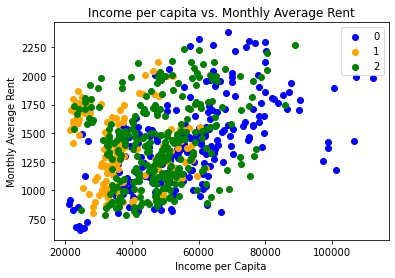

In [21]:
image_name = "km_scatter.png"
plt.figure()
plt.scatter(cluster_0_km['median_income'], cluster_0_km.Monthly_Avg_Zip, color="blue", label='0')
plt.scatter(cluster_1_km['median_income'], cluster_1_km.Monthly_Avg_Zip, color="orange", label='1')
plt.scatter(cluster_2_km['median_income'], cluster_2_km.Monthly_Avg_Zip, color="green", label='2')
plt.xlabel('Income per Capita')
plt.ylabel('Monthly Average Rent')
plt.legend()
plt.title('Income per capita vs. Monthly Average Rent')
plt.savefig("../../images/" + subdir + "/" + image_name,  bbox_inches='tight')
plt.show()

In [ ]:
########## agglomerative clustering ######

In [22]:
norm_subset_df = pd.DataFrame(normalize(subset_df,axis=0),columns=subset_df.columns)

In [23]:
norm_subset_df

,vacant_housing_units_for_rent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent
0,0.066856,0.044844,0.038045,0.037438
1,0.077805,0.065999,0.065240,0.043747
2,0.094143,0.056812,0.062636,0.079534
3,0.045349,0.036699,0.047302,0.063321
4,0.033901,0.035905,0.049617,0.038499
...,...,...,...,...
636,0.014227,0.011074,0.020613,0.011733
637,0.006002,0.008989,0.011572,0.017334
638,0.032289,0.015842,0.029148,0.015270
639,0.027065,0.049214,0.038912,0.052944


In [24]:
ag = AgglomerativeClustering()
ag.set_params(n_clusters=3)
ag.fit(norm_subset_df)

ag_subset_df = subset_df.copy()
ag_subset_df['cluster'] = ag.labels_
ag_subset_df

,vacant_housing_units_for_rent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,cluster
zip_code,,,,,
33160,1203,903.0,526.0,635.0,0
33025,1400,1329.0,902.0,742.0,1
33139,1694,1144.0,866.0,1349.0,1
32256,816,739.0,654.0,1074.0,1
33009,610,723.0,686.0,653.0,0
...,...,...,...,...,...
33413,256,223.0,285.0,199.0,2
32204,108,181.0,160.0,294.0,2
32206,581,319.0,403.0,259.0,0


In [25]:
total_merge_ag = pd.merge(total_df, ag_subset_df, on = ag_subset_df.columns.tolist()[:-1] + ['zip_code'])
total_merge_ag

,Monthly_Avg_Zip,FL_Unemployment,year,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,...,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg,median_pct_increase,cluster
zip_code,,,,,,,,,,,,,,,,,,,,,
33160,1866.833333,7.533333,2013,37674,19247,18472,19202,49.6,626,654,...,7911.0,4713.0,935,1346,965,6471,2019,291.6550,0.022971,0
33025,1341.083333,7.533333,2013,57766,21206,27852,29914,32.9,2143,2102,...,10806.0,8948.0,2963,3682,3345,18163,4987,291.6550,0.021003,1
33139,1842.666667,7.533333,2013,38066,20883,22090,15976,38.1,981,513,...,9995.0,4865.0,685,649,379,5387,1906,291.6550,0.020404,1
32256,947.750000,7.533333,2013,40024,18039,18865,21159,32.7,1084,1124,...,11070.0,6247.0,1638,1598,1629,10962,3429,291.6550,0.027058,1
33009,1443.416667,7.533333,2013,39889,19125,19256,20633,47.1,1213,830,...,5087.0,4958.0,1335,1020,1249,6495,1885,291.6550,0.028284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33413,1447.583333,3.625000,2018,17473,5099,8493,8980,34.7,762,638,...,2399.0,2423.0,1103,932,848,4875,1107,444.3875,0.021767,2
32204,1008.750000,3.625000,2018,7507,3825,3352,4155,34.0,110,143,...,2078.0,737.0,176,201,231,1237,269,444.3875,0.012807,2
32206,719.833333,3.625000,2018,16500,6767,7954,8546,37.4,431,519,...,1476.0,1366.0,956,654,757,3743,809,444.3875,0.007578,0


In [26]:
total_merge_ag_group_by_cluster = total_merge_ag.groupby('cluster')['median_pct_increase']\
    .aggregate(['mean'])

total_merge_ag_group_by_cluster = total_merge_ag_group_by_cluster.style\
    .hide_columns()\
    .set_caption(
    "Median YOY Rent Change By Cluster, Agglomerative"
)

total_merge_ag_group_by_cluster

0,0.040876
1,0.039307
2,0.040099


In [27]:
image_name = "ag_numbers"
dfi.export(total_merge_ag_group_by_cluster,"../../images/" + subdir + "/" + image_name)

In [28]:
total_merge_ag.reset_index(inplace=True)
total_merge_ag = total_merge_ag.rename(columns = {'index':'zipcode'})

In [31]:
# fig = px.choropleth_mapbox(total_merge_ag, geojson=fla_shapefiles, locations='zip_code', color='cluster',
#                            featureidkey='properties.ZCTA5CE10',
#                            color_continuous_scale="Viridis",
#                            mapbox_style="carto-positron",
#                            zoom=7.2, center = {"lat": 26.2, "lon": -81.0 },
#                            opacity=0.5,
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [30]:
image_name = "ag_map.png"
fig.write_image("../../images/" + subdir + "/" + image_name)

In [32]:
cluster_0_ag = total_merge_ag[total_merge_ag['cluster'] == 0]
cluster_1_ag = total_merge_ag[total_merge_ag['cluster'] == 1]
cluster_2_ag = total_merge_ag[total_merge_ag['cluster'] == 2]

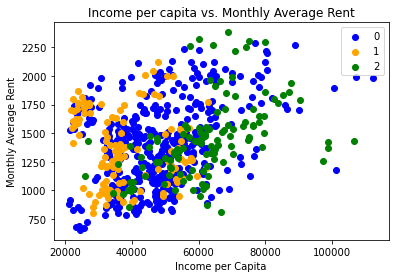

In [33]:
image_name = "ag_scatter.png"
plt.figure()
plt.scatter(cluster_0_ag['median_income'], cluster_0_ag.Monthly_Avg_Zip, color='blue', label='0' )
plt.scatter(cluster_1_ag['median_income'], cluster_1_ag.Monthly_Avg_Zip, color='orange', label='1')
plt.scatter(cluster_2_ag['median_income'], cluster_2_ag.Monthly_Avg_Zip, color='green', label='2')
plt.xlabel('Income per Capita')
plt.ylabel('Monthly Average Rent')
plt.legend()
plt.title('Income per capita vs. Monthly Average Rent')
plt.savefig("../../images/" + subdir + "/" + image_name,  bbox_inches='tight')
plt.show()